We will start from the question "Can we use movie budgets to predict movie reveneu?"

In [29]:
import matplotlib.pyplot as plt


In [7]:
#Fisrt let's clean the data, taken form https://www.the-numbers.com/movie/budgets/all 
import pandas as pd

df= pd.read_csv('cost_revenue_dirty.csv')
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [8]:
#Let's delete the rows that had zero revenue
df= df[df['Worldwide Gross ($)'] != '$0']
df.head()


,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
5,4250,12/30/1925,Ben-Hur,"$3,900,000","$9,000,000","$9,000,000"


In [9]:
#let's remove the columns of domestic Gross, Rank, Release Date and Movie title
drops = ['Rank','Release Date','Movie Title','Domestic Gross ($)']
for i in drops:
    df.drop(i, inplace=True, axis=1)
df.head()


,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
5,"$3,900,000","$9,000,000"


In [14]:
#Now let's remove the $ and make all the records numbers
df["Production Budget ($)"]=df["Production Budget ($)"].str.replace("$","")
df["Worldwide Gross ($)"]=df["Worldwide Gross ($)"].str.replace("$","")


C:\Users\pipe_\AppData\Local\Temp\ipykernel_6432\2957744758.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production Budget ($)"]=df["Production Budget ($)"].str.replace("$","")
C:\Users\pipe_\AppData\Local\Temp\ipykernel_6432\2957744758.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Worldwide Gross ($)"]=df["Worldwide Gross ($)"].str.replace("$","")


In [15]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,"110,000","11,000,000"
2,"200,000","8,000,000"
3,"100,000","3,000,000"
4,"245,000","22,000,000"
5,"3,900,000","9,000,000"


In [17]:
#Now let's remove all the ,
df["Production Budget ($)"]=df["Production Budget ($)"].str.replace(",","")
df["Worldwide Gross ($)"]=df["Worldwide Gross ($)"].str.replace(",","")


In [18]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
2,200000,8000000
3,100000,3000000
4,245000,22000000
5,3900000,9000000


In [20]:
#Let's make the strings into integers
df["Production Budget ($)"] = df["Production Budget ($)"].astype(float)


In [22]:
df["Worldwide Gross ($)"] = df["Worldwide Gross ($)"].astype(float)

In [23]:
df.rename(columns = {'Production Budget ($)':'Budget_USD', 'Worldwide Gross ($)':'Gross_USD'}, inplace = True)

In [26]:
df.head()

,Budget_USD,Gross_USD
0,110000.0,11000000.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
5,3900000.0,9000000.0


In [27]:
#Let's explore and visualize the new data

df.describe()

,Budget_USD,Gross_USD
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [31]:
#Let's separate the data in two datasets
X= pd.DataFrame(df, columns=['Budget_USD'])
y = pd.DataFrame(df, columns=['Gross_USD'])

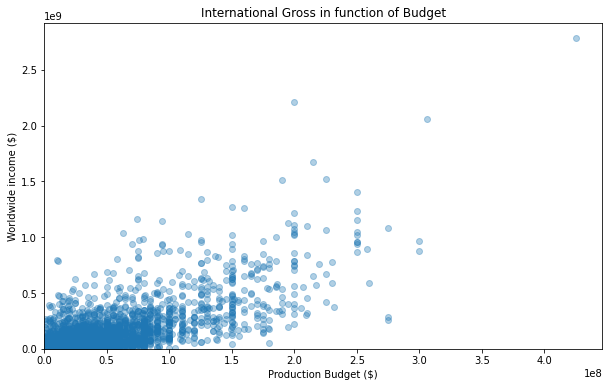

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.35)
plt.title('International Gross in function of Budget')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide income ($)')
plt.xlim(0)
plt.ylim(0)

plt.show()